In [1]:
import numpy as np
np.random.seed(1000)

import cv2
# specifying paths
import os

# image resize, convert img to numpy and vice versaa
from PIL import Image

# from tensorflow.keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Input
# os.environment['KERAS_BACKEND'] = 'tensorflow'

from tensorflow.keras.models import Model

In [2]:
image_directory = 'cell_images/'
SIZE = 64

# images & their labels {0: Parasitized, 1: Uninfected}
dataset = []
label = []

# specify location of parasitized images
parasitized_images = os.listdir(image_directory + 'Parasitized/')
count_parasitized = 0
# iterate over those images
for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1] == 'png'and count_parasitized != 1000):
        # read
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        # image
        image = Image.fromarray(image, 'RGB')
        # resize
        image = image.resize((SIZE,SIZE))
        # add the individual image array to list (dataset, label)
        dataset.append(np.array(image))
        label.append(0)
        count_parasitized += 1

# specify location of uninfected images
uninfected_images = os.listdir(image_directory + 'Uninfected/')
count_uninfected = 0
# iterate over those images
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png' and count_uninfected != 1000):
        # read
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        # image
        image = Image.fromarray(image, 'RGB')
        # resize
        image = image.resize((SIZE,SIZE))
        # add the individual image array to list (dataset, label)
        dataset.append(np.array(image))
        label.append(1)
        count_uninfected += 1

In [3]:
len(dataset)

2000

In [4]:
INPUT_SHAPE = (SIZE, SIZE, 3)

inp = Input(shape=(INPUT_SHAPE))

conv1 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = BatchNormalization(axis=-1)(pool1)
drop1 = Dropout(rate=0.2)(norm1)

conv2 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv1)
norm2 = BatchNormalization(axis=-1)(pool1)
drop2 = Dropout(rate=0.2)(norm2)

# Flatten the matrix to get it ready for Dense Layers
flat = Flatten()(drop2)

hidden1 = Dense(256, activation='relu')(flat)
norm3 = BatchNormalization(axis=-1)(hidden1)
drop3 =Dropout(rate=0.2)(norm3)

hidden2 = Dense(128, activation='relu')(flat)
norm4 = BatchNormalization(axis=-1)(hidden2)
drop4 =Dropout(rate=0.2)(norm4)

out = Dense(2, activation='sigmoid')(drop4)

2023-02-04 16:13:38.028137: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-04 16:13:38.028274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [5]:
model = Model(inputs=inp, outputs=out)

In [6]:
model.compile(optimizer='Adam', loss='categorical_cr ossentropy', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0     

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(label), test_size=0.2, random_state=0)

In [9]:
history = model.fit(
    np.array(X_train), 
    np.array(y_train), 
    verbose=1, 
    batch_size=64, 
    epochs=25, 
    validation_split=0.2, 
    shuffle=False)

Epoch 1/25


2023-02-04 16:13:38.813984: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-04 16:13:39.164167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 55ms/step - loss: 0.8959 - accuracy: 0.6430 - val_loss: 2.3041 - val_accuracy: 0.6750
Epoch 2/25
 1/20 [>.............................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8906

2023-02-04 16:13:40.471119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 58ms/step - loss: 0.3739 - accuracy: 0.8453 - val_loss: 1.8432 - val_accuracy: 0.6219
Epoch 3/25
20/20 [==============================] - 1s 57ms/step - loss: 0.2448 - accuracy: 0.9172 - val_loss: 1.1256 - val_accuracy: 0.6750
Epoch 4/25
20/20 [==============================] - 1s 48ms/step - loss: 0.1305 - accuracy: 0.9781 - val_loss: 0.8810 - val_accuracy: 0.6656
Epoch 5/25
20/20 [==============================] - 1s 42ms/step - loss: 0.0705 - accuracy: 0.9953 - val_loss: 1.0980 - val_accuracy: 0.6719
Epoch 6/25
20/20 [==============================] - 1s 42ms/step - loss: 0.0349 - accuracy: 0.9992 - val_loss: 1.2633 - val_accuracy: 0.6062
Epoch 7/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 1.4507 - val_accuracy: 0.5719
Epoch 8/25
20/20 [==============================] - 1s 40ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.9047 - val_accuracy: 0.7094
Epoch 9/25
20/20 [======

In [10]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

11/13 [========================>.....] - ETA: 0s - loss: 0.9856 - accuracy: 0.6989

2023-02-04 16:14:01.829598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 14ms/step - loss: 1.0115 - accuracy: 0.6875
Test_Accuracy: 68.75%


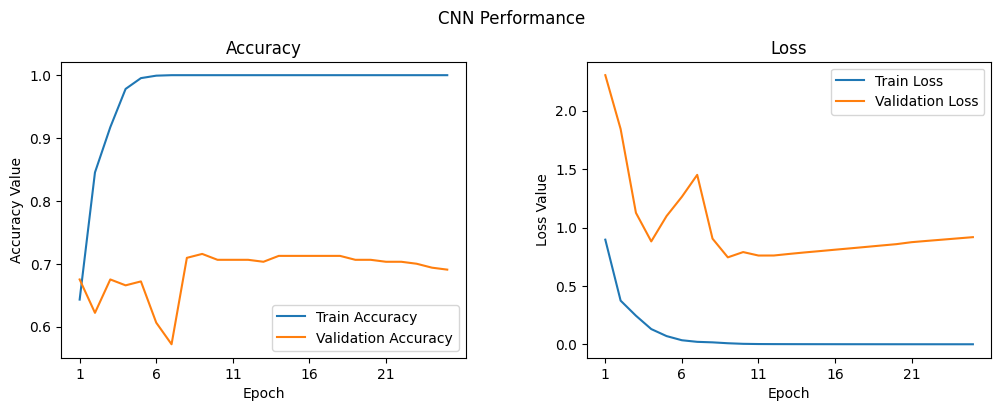

In [11]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")